In [17]:
import pandas as pd
import numpy as np
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df = pd.read_csv('data/player_price.csv')

df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.loc[df["player_id"] == 2]
df.drop(["timestamp", "ps_price", "player_name", "player_id"], axis=1, inplace=True)
df.rename(columns={"xbox_price": "price"}, inplace=True)
df=df[df.date>='2016-10-01']

print(df.shape)
df=df.set_index('date')


df.head()

(265, 2)


,price
date,
2016-10-01,1223429
2016-10-02,1296776
2016-10-03,1330143
2016-10-04,1289478
2016-10-05,1296080


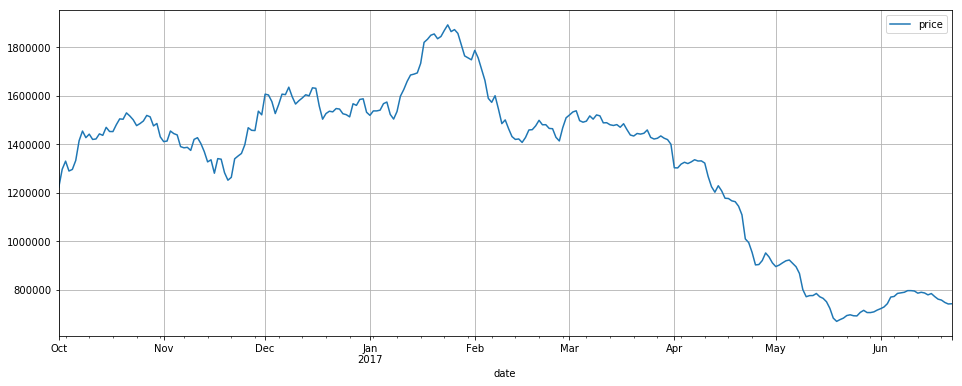

In [52]:
df.plot(figsize=(16,6))
plt.grid()

In [187]:
print(df.price[-1:].values[0])
price=pd.Series(1,#df.price[-1:].values[0],#int(df.price[].median()),
                index=['2016-06-23','2016-06-24','2016-06-25','2016-06-26','2016-06-27','2016-06-28','2016-06-29'])

predict_date=pd.DataFrame(columns=['date','price'])
predict_date['date']=price.index.astype(str)
predict_date.price=price.values
predict_date.price=predict_date.price.astype(int)
predict_date=predict_date.set_index('date')
#print(predict_date)

df=df.append(predict_date)
print(df.tail(10))

742514
             price
date              
2016-06-27  742514
2016-06-28  742514
2016-06-29  742514
2016-06-23       1
2016-06-24       1
2016-06-25       1
2016-06-26       1
2016-06-27       1
2016-06-28       1
2016-06-29       1


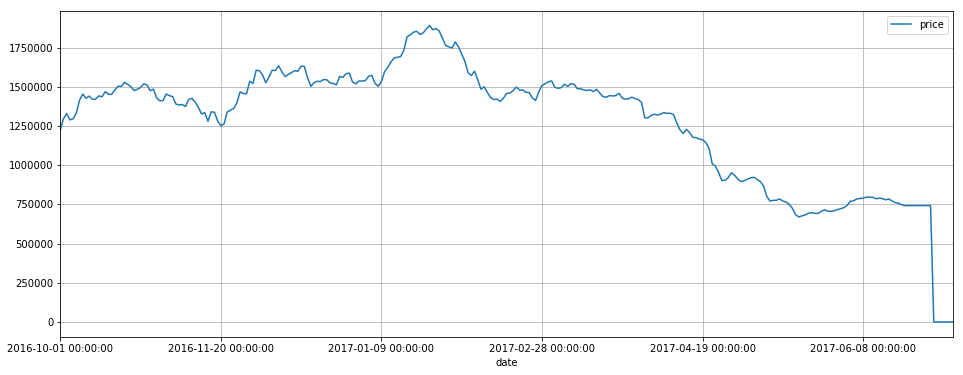

In [188]:
df.plot(figsize=(16,6))
plt.grid()

In [189]:
dataset = df.values
dataset = dataset.astype('float32')

In [190]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [191]:
len(dataset)

279

In [192]:
#train_size = int(len(dataset) * 0.975)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train, test = dataset[0:len(dataset)-7,:], dataset[-7:]
print(len(train), len(test))

272 7


In [193]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [194]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/50
3s - loss: 0.2272
Epoch 2/50
0s - loss: 0.0159
Epoch 3/50
0s - loss: 0.0111
Epoch 4/50
0s - loss: 0.0095
Epoch 5/50
0s - loss: 0.0077
Epoch 6/50
0s - loss: 0.0060
Epoch 7/50
1s - loss: 0.0043
Epoch 8/50
0s - loss: 0.0030
Epoch 9/50
0s - loss: 0.0020
Epoch 10/50
0s - loss: 0.0012
Epoch 11/50
0s - loss: 7.4092e-04
Epoch 12/50
0s - loss: 4.6813e-04
Epoch 13/50
0s - loss: 3.3038e-04
Epoch 14/50
0s - loss: 2.9733e-04
Epoch 15/50
0s - loss: 2.6512e-04
Epoch 16/50
0s - loss: 2.6441e-04
Epoch 17/50
1s - loss: 2.6868e-04
Epoch 18/50
0s - loss: 2.7939e-04
Epoch 19/50
0s - loss: 2.7171e-04
Epoch 20/50
0s - loss: 2.8247e-04
Epoch 21/50
0s - loss: 2.8594e-04
Epoch 22/50
0s - loss: 2.6661e-04
Epoch 23/50
0s - loss: 2.8448e-04
Epoch 24/50
0s - loss: 2.6539e-04
Epoch 25/50
0s - loss: 2.7776e-04
Epoch 26/50
0s - loss: 2.7431e-04
Epoch 27/50
0s - loss: 2.7819e-04
Epoch 28/50
0s - loss: 2.7550e-04
Epoch 29/50
0s - loss: 2.8707e-04
Epoch 30/50
1s - loss: 2.6992e-04
Epoch 31/50
0s - loss: 2.7499

In [195]:
testX

array([[[ 0.]],

       [[ 0.]],

       [[ 0.]],

       [[ 0.]],

       [[ 0.]]], dtype=float32)

In [196]:
testY

array([[ 1.,  1.,  1.,  1.,  1.]])

In [197]:
testPredict

array([[ 157221.5],
       [ 157221.5],
       [ 157221.5],
       [ 157221.5],
       [ 157221.5]], dtype=float32)

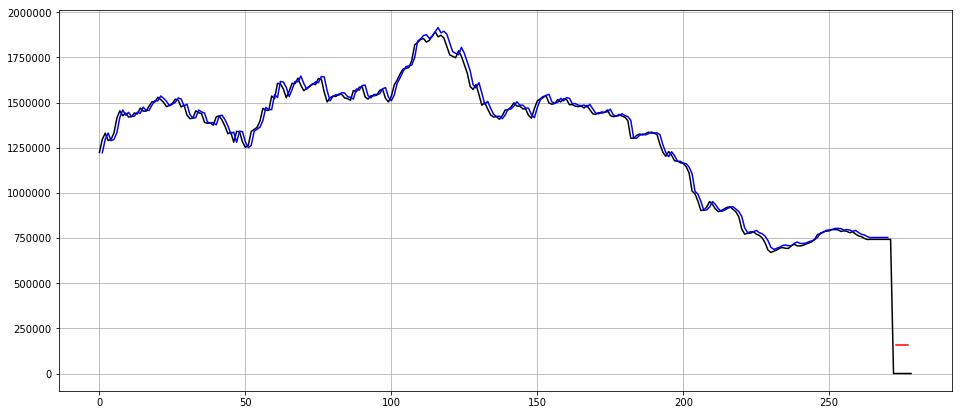

In [198]:
plt.figure(figsize=(16,7))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),'k')
plt.plot(trainPredictPlot,'b')
plt.plot(testPredictPlot,'r')
plt.grid()